In [1]:
import numpy as np
import os
import matplotlib.pyplot as plot

In [2]:
def data_generator(mean, std, n_measurements = 500, n_samples = 20):
    """
Generate an array of measurements from a normal distribution.
Parameters
----------
mean : float
Desired mean value of the measurements.
std : float
Desired standard deviation of the measurements.
n_measurements : int, optional
Number of separate measurements. Default is 500 measurements.
n_samples : int, optional
Number of samples taken per measurement. Default is 20 sam
ples. 
per measurement.
Returns
-------
data : numpy.ndarray
Array representing the experimental data. Each measurement 
(composed of many samples) is a row of this array:
--------------------------
---------
meas1    | sample0 | sample1 | sample2 | ...
meas2    | sample0 | sample1 | sample2 | ...
meas3    | sample0 | sample1 | sample2 | ...
...
    """

    return np.random.normal(loc = mean, scale = std, size = (n_measurements, n_samples))

In [3]:
def Gaussian(Amp,x, u, s):
    return Amp*np.exp(-(x-u)*(x-u)/(2*s*s))/(s*np.sqrt(2*np.pi))

In [4]:
data = "rollingcylinderdata.csv"
result = np.transpose(np.loadtxt(data,delimiter=','))

In [5]:
mean = np.mean(result[3])
std = np.std(result[3])

In [6]:
sim = data_generator(mean,std)
simdata = np.ravel(sim)

In [7]:
# mean and std of the distribution of measurements
meansim = np.mean(simdata)
stdsim = np.std(simdata)
print(meansim)
print(stdsim)

2.765792188175177
0.10498017608832458


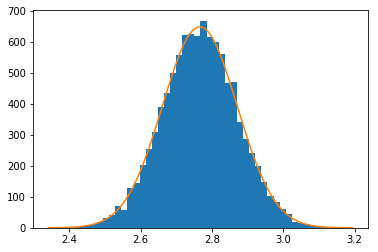

In [8]:
height, bins, _ = plot.hist(simdata,50)
x=np.linspace(bins[0],bins[-1],100)
width = bins[1]-bins[0]
area = height*width
amp1 = np.sum(area)
y=Gaussian(amp1,x,meansim,stdsim)
plot.plot(x,y)
plot.show()
# distribution of results
# when bin number increases, the graph becomes closer to the gaussian.
# but when the number approaches to the total number of data, 
# the graph is small and almost unreadable.
# when the number decreases, the graph doesnt look like gaussin anymore,
# with small nunmber (1-5), the graph doesnt make sens.

In [9]:
print(height)
print(bins)

[  1.   1.   2.   1.   4.   7.   8.  12.  20.  31.  40.  70.  57. 129.
 145. 202. 254. 310. 391. 436. 499. 559. 623. 625. 619. 669. 617. 601.
 563. 467. 471. 342. 286. 241. 199. 147. 103.  82.  61.  45.  20.  14.
  12.   5.   5.   2.   0.   1.   0.   1.]
[2.34054804 2.35763217 2.37471631 2.39180044 2.40888457 2.4259687
 2.44305284 2.46013697 2.4772211  2.49430524 2.51138937 2.5284735
 2.54555763 2.56264177 2.5797259  2.59681003 2.61389416 2.6309783
 2.64806243 2.66514656 2.6822307  2.69931483 2.71639896 2.73348309
 2.75056723 2.76765136 2.78473549 2.80181962 2.81890376 2.83598789
 2.85307202 2.87015616 2.88724029 2.90432442 2.92140855 2.93849269
 2.95557682 2.97266095 2.98974508 3.00682922 3.02391335 3.04099748
 3.05808162 3.07516575 3.09224988 3.10933401 3.12641815 3.14350228
 3.16058641 3.17767054 3.19475468]


In [10]:
np.savetxt("Height", height)
np.savetxt("Bin",bins)

In [11]:
means = []
for i in range(500):
    x = np.mean(sim[i])
    means.append(x)

In [12]:
# mean and std of the distribution of results
meanmean = np.mean(means)
stdmean = np.std(means)
print(meanmean)
print(stdmean)

2.765792188175176
0.023776854488085572


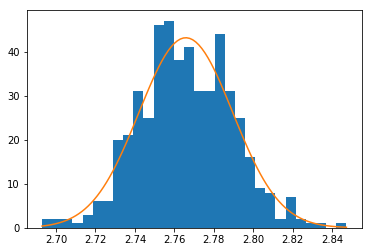

In [13]:
height2, bins2, _ = plot.hist(means,30)
x2=np.linspace(bins2[0],bins2[-1],100)
width2 = bins2[1]-bins2[0]
area2 = height2*width2
amp2 = np.sum(area2)
y2=Gaussian(amp2,x2,meanmean,stdmean)
plot.plot(x2,y2)
plot.show()
# distribution of results
# same effect as above.
# when bin number goes up, the graph looks like noises.

In [14]:
np.savetxt('Height2', height2)
np.savetxt('Bin2', bins2)

In [15]:
factor = stdmean/stdsim
print(factor)
# 4. 
# the std of distribution of results is 22.3% the std of distribution of measurements
stdsim/np.sqrt(10000)
# 

0.22648899415143892


0.0010498017608832457

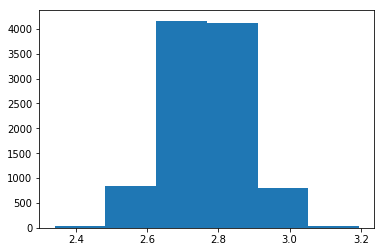

In [16]:
height3, bins3, _ = plot.hist(simdata,6)
plot.show()

In [17]:
sig1 = (height3[2]+height3[3])/np.sum(height3)
print(sig1) # fraction within 1 sigma
print(34.1*2) # fraction of gaussian distribution

0.8288
68.2


In [18]:
sig2 = (height3[1]+height3[2]+height3[3]+height3[4])/np.sum(height3)
print(sig2) # fraction within 2 sigma
print(34.1*2+13.6*2) # fraction of gaussian distribution

0.993
95.4


In [19]:
sig3 = (height3[0]+height3[1]+height3[2]+height3[3]+height3[4]+height3[5])/np.sum(height3)
print(sig3) # fraction within 3 sigma
print(34.1*2+13.6*2+2.1*2) # fraction of gaussian distribution

1.0
99.60000000000001


In [20]:
# we can see that the fractions are similar except that the simulated data are more concentrated within 1 sigma than the gaussian